In [1]:
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True)
sns.set(context="notebook", font_scale=1.0, font="serif")

results_dir = Path("../results/")

In [2]:
res_files = results_dir.glob('*')

In [4]:
results = {}
for f in res_files:
    experiment = str(f).split('.')[-2].split("/")[-1]
    results[experiment] = pickle.load(open(f, 'rb'))

In [5]:
results

{'knn_item_cf_results_full_3_k_20': {'knn_cf': {'ndgc_knn': 0.01724111455287408,
   'rec_knn': 0.03220239401262736,
   'hr_knn': 0.05582477224268269},
  'most_popular': {'ndgc_mp': 0.009049437980297675,
   'rec_mp': 0.02086616875374725,
   'hr_mp': 0.047328293596950316}},
 'knn_item_cf_results_full_5_k_100': {'knn_cf': {'ndgc_knn': 0.01800519519785412,
   'rec_knn': 0.04784181851895651,
   'hr_knn': 0.10343086374729991},
  'most_popular': {'ndgc_mp': 0.01627913933179732,
   'rec_mp': 0.056176102850301765,
   'hr_mp': 0.13597217157124022}},
 'knn_item_cf_results_full_7_k_50': {'knn_cf': {'ndgc_knn': 0.013177624646092853,
   'rec_knn': 0.03180105580607061,
   'hr_knn': 0.07655970720912418},
  'most_popular': {'ndgc_mp': 0.010725564039931603,
   'rec_mp': 0.02960931825570678,
   'hr_mp': 0.08851817175929866}},
 'knn_item_cf_results_5core_7_k_100': {'knn_cf': {'ndgc_knn': 0.018493460575646586,
   'rec_knn': 0.052258188299315486,
   'hr_knn': 0.14064221306458852},
  'most_popular': {'ndgc_m

In [6]:
df_list = []
for mi in ['_3_k_', '_5_k_', '_7_k_']:
    tmp_dict = {k:v for k,v in results.items() if mi in k}
    for exp, algos in tmp_dict.items():
        atk = exp.split("_")[-1]
        ni = exp.split("_")[-3]
        dt = exp.split("_")[-4]
        for algo, mets in algos.items():
            for met, val in mets.items():
                mnm = met.split("_")[0]
                alg = met.split("_")[1]
                df = pd.DataFrame([atk, ni, dt, mnm, alg, val]).transpose()
                df.columns = ["k", "ni", "dataset", "metric", "algo", "value"]
                df_list.append(df)

In [7]:
res_df = pd.concat(df_list).reset_index(drop=True)

In [8]:
res_df["k"] = res_df.k.astype(int)
res_df["ni"] = res_df.ni.astype(int)
res_df["value"] = res_df.value.astype(float)

In [9]:
res_df.head(30)

,k,ni,dataset,metric,algo,value
0,20,3,full,ndgc,knn,0.017241
1,20,3,full,rec,knn,0.032202
2,20,3,full,hr,knn,0.055825
3,20,3,full,ndgc,mp,0.009049
4,20,3,full,rec,mp,0.020866
5,20,3,full,hr,mp,0.047328
6,100,3,full,ndgc,knn,0.021892
7,100,3,full,rec,knn,0.054177
8,100,3,full,hr,knn,0.100552
9,100,3,full,ndgc,mp,0.017836


In [10]:
experiments = sorted(list(zip(["5core", "full"]*9, ["ndgc", "hr", "rec"]*6)))

In [11]:
experiments = list(zip([3, 5, 7] * 6, experiments))

In [12]:
experiments = [[exp[0], exp[1][0], exp[1][1]] for exp in experiments]

In [13]:
experiments = sorted(experiments, key = lambda x: (x[0], x[2]))

In [14]:
experiments

[[3, '5core', 'hr'],
 [3, 'full', 'hr'],
 [3, '5core', 'ndgc'],
 [3, 'full', 'ndgc'],
 [3, '5core', 'rec'],
 [3, 'full', 'rec'],
 [5, '5core', 'hr'],
 [5, 'full', 'hr'],
 [5, '5core', 'ndgc'],
 [5, 'full', 'ndgc'],
 [5, '5core', 'rec'],
 [5, 'full', 'rec'],
 [7, '5core', 'hr'],
 [7, 'full', 'hr'],
 [7, '5core', 'ndgc'],
 [7, 'full', 'ndgc'],
 [7, '5core', 'rec'],
 [7, 'full', 'rec']]

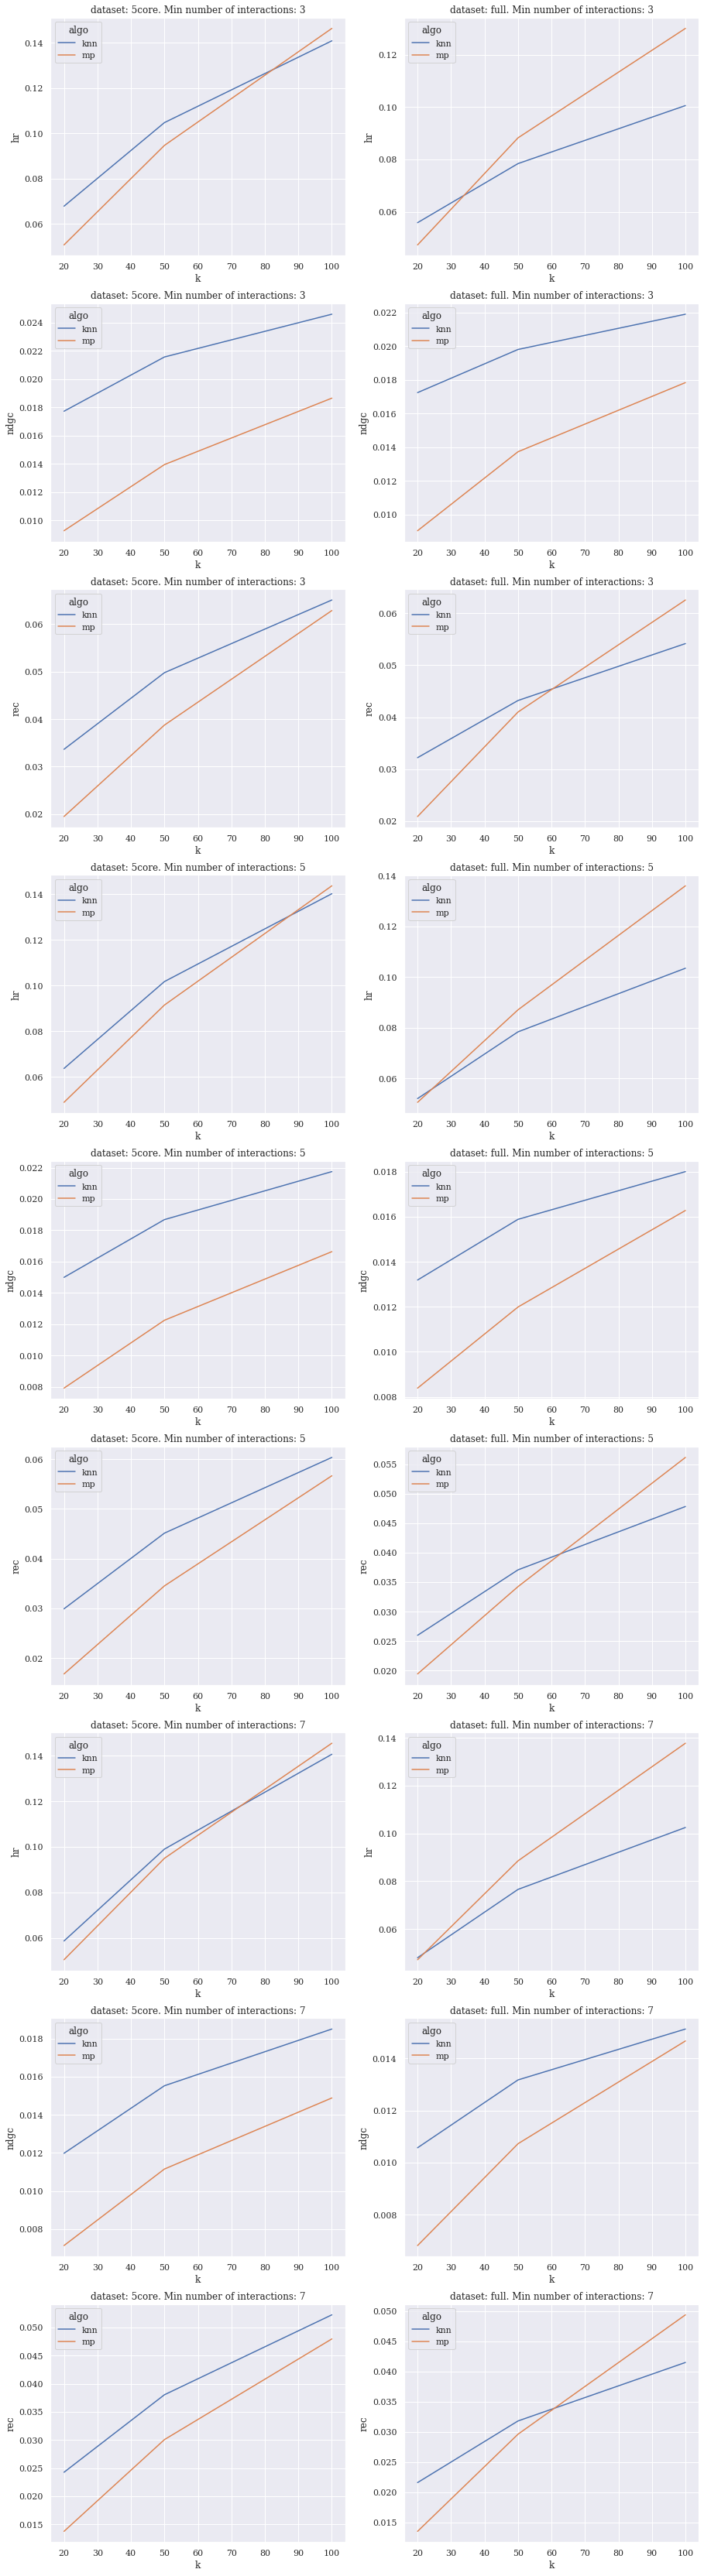

In [15]:
plt.figure(figsize=(15, 60))
for i, exp in enumerate(experiments):
    ni = exp[0]
    dt = exp[1]
    mt = exp[2]
    tdf = res_df[(res_df.dataset==dt) & (res_df.metric == mt) & (res_df.ni == ni)]
    plt.subplot(9, 2, i+1)
    sns.lineplot(x=tdf.k, y=tdf.value, hue=tdf.algo)
    plt.ylabel(mt)
    plt.title("dataset: {}. Min number of interactions: {}".format(dt, ni))